In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from utils import window_iter

In [31]:
ecg = np.loadtxt('./data/ecg.dat')
n_samples = ecg.shape[0]
Fs = 500 # sampling frequency in Hz

powerline_freq = 49.52 # Hz
powerline_freq = 50 # Hz
# TODO: should the amplitude be 1?
noise_ref = np.cos(2 * np.pi * powerline_freq / Fs * np.arange(n_samples))

In [69]:
# does noise_ref correlate with the noise in ecg?
lag = 200
np.corrcoef(noise_ref[lag:], ecg[:-lag])[0,1]

0.006530039129269003

In [70]:
mu = 0.001 # step size
n_taps = 2 # number of filter taps

y = np.empty(n_samples)
w = np.zeros(n_taps) # filter coefficients
ws = np.zeros((n_samples, n_taps)) # used for plotting later
err = np.empty(n_samples)
d = noise_ref # desired signal is the noise reference (counter intuitive, i know)
x = ecg # input signal


# for i, x_window in enumerate(window_iter(x, n_taps)):
#     # compute output
#     y[i] = np.dot(w, x_window) # apply FIR filter
#     # compute error and save it
#     err[i] = d[i] - y[i]
#     # update weights        
#     w += mu * 2 * err[i] * x_window
#     ws[i] = w


buffer = np.zeros(n_taps)
coefficients = np.zeros(n_taps)


# taken from
# https://www.youtube.com/watch?v=OPWHS9LYunA

def _filter(v):
    global buffer
    for j in range(n_taps-1):
        buffer[n_taps-j-1] = buffer[n_taps-j-2]
    buffer[0] = v

    return np.inner(buffer, coefficients)

def lms(error):
    global coefficients
    for j in range(n_taps):
        coefficients[j] += mu * 2 * error * buffer[j]

    

for i in range(n_samples):
    ref_noise = np.sin(2 * np.pi * powerline_freq / Fs * i)
    canceller = _filter(ref_noise)
    output_signal = ecg[i] - canceller
    lms(output_signal)
    y[i] = output_signal




# def _filter(v):
#     global w
#     y = np.dot(w, v)
#     e = ecg[i] - y
#     w += mu * e * v
#     return y

# # def lms(error):
#     # global w
#     w += mu * s/error * x

# for i in range(n_samples):
#     ref_noise = np.sin(2*np.pi*powerline_freq/Fs * i)
#     canceller = _filter(ref_noise)
#     output_signal = ecg[i] - canceller
#     # lms(output_signal, mu)
#     y[i] = output_signal




err.shape (29701,)
ecg.shape (29701,)
y.shape (29701,)


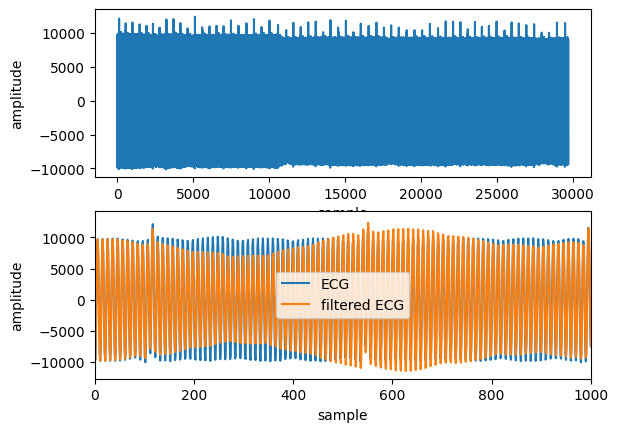

In [71]:
# plot the ECG signal and the error on top of the noisy ecg signal

_, ax = plt.subplots(2, 1)
ax[0].plot(ecg, label='ECG')
ax[0].set_xlabel('sample')
ax[0].set_ylabel('amplitude')

print('err.shape', err.shape)
print('ecg.shape', ecg.shape)
print('y.shape', y.shape)

ax[1].plot(ecg, label='ECG')
ax[1].plot(y, label='filtered ECG')
ax[1].set_xlabel('sample')
ax[1].set_ylabel('amplitude')
ax[1].set_xlim(0, 1000)
ax[1].legend()



plt.show()


# plt.figure(figsize=(10, 6))
# plt.plot(ecg, label='ECG')
# plt.plot(y, label='error')
